In [31]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/year_sunspot.csv')
data.head()

,Year (decimal),Yearly mean total sunspot number,Standard deviation,Number of observations,Definitive/provisional indicator
0,1701.5,18.3,-1.0,-1,1
1,1702.5,26.7,-1.0,-1,1
2,1703.5,38.3,-1.0,-1,1
3,1704.5,60.0,-1.0,-1,1
4,1705.5,96.7,-1.0,-1,1


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2y1gy7l/56rmfmuk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2y1gy7l/2_ex61d1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68824', 'data', 'file=/tmp/tmpo2y1gy7l/56rmfmuk.json', 'init=/tmp/tmpo2y1gy7l/2_ex61d1.json', 'output', 'file=/tmp/tmpo2y1gy7l/prophet_modeldvch_8fi/prophet_model-20241129012244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:22:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:22:44 - cmdstanpy - INFO - Chain [1] do

MAE: 52.480899334004405, MAPE: 3618407263881393.0, R2: -0.014221202385967135


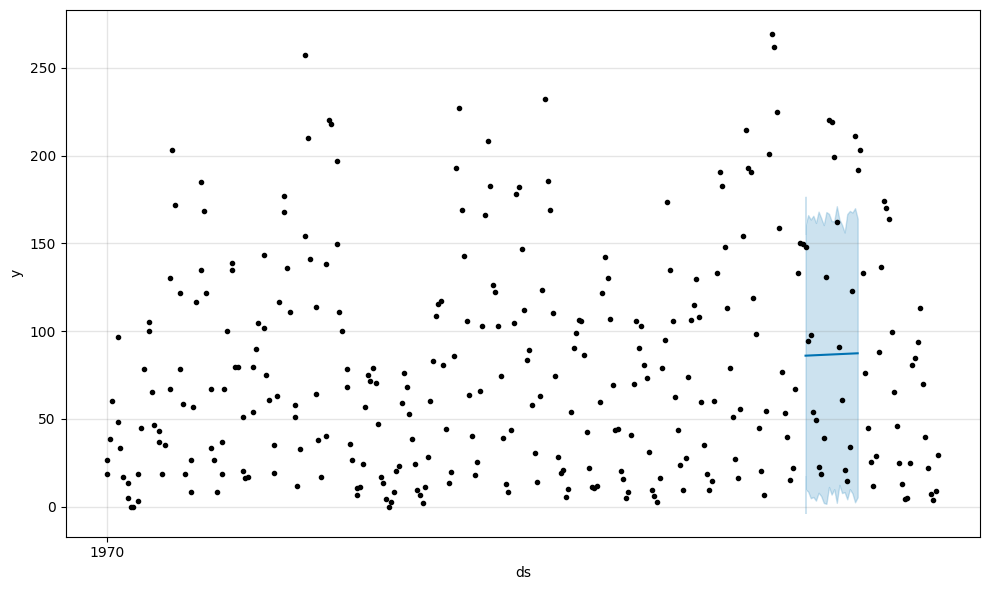

In [25]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

data.columns = ['ds', 'y','n','m','r']
data['ds'] = pd.to_datetime(data['ds'], format='%Y')

# Instead of converting to Python's datetime, scale the 'ds' column
# Find the minimum date
min_date = data['ds'].min()

# Create a new 'ds' column representing the number of years since the minimum date
# Convert both 'ds' and 'min_date' to numeric before subtraction
# Use .timestamp() to get a numeric representation of the dates
data['ds'] = (data['ds'].apply(lambda x: x.timestamp()) - min_date.timestamp()) / (365.25 * 24 * 60 * 60)

# Initialize the Prophet model
model = Prophet(growth='linear')
model.add_seasonality(name='yearly', period=11, fourier_order=5)

# Fit the model
model.fit(data)

# Create a future dataframe for 20 years
# Since 'ds' is now scaled, adjust the future dataframe creation
future = model.make_future_dataframe(periods=20, freq='Y')
# Use .timestamp() to get a numeric representation of the dates in the future dataframe
future['ds'] = (future['ds'].apply(lambda x: x.timestamp()) - min_date.timestamp()) / (365.25 * 24 * 60 * 60)

# Forecast
forecast = model.predict(future)

# Evaluate the model on historical data
y_true = data['y']
y_pred = forecast.loc[:len(y_true)-1, 'yhat']  # Adjust if needed based on 'ds' scaling
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Display evaluation metrics
print(f"MAE: {mae}, MAPE: {mape}, R2: {r2}")

# Visualize the forecast
# You may need to adjust the plot to reflect the scaled 'ds'
fig = model.plot(forecast)

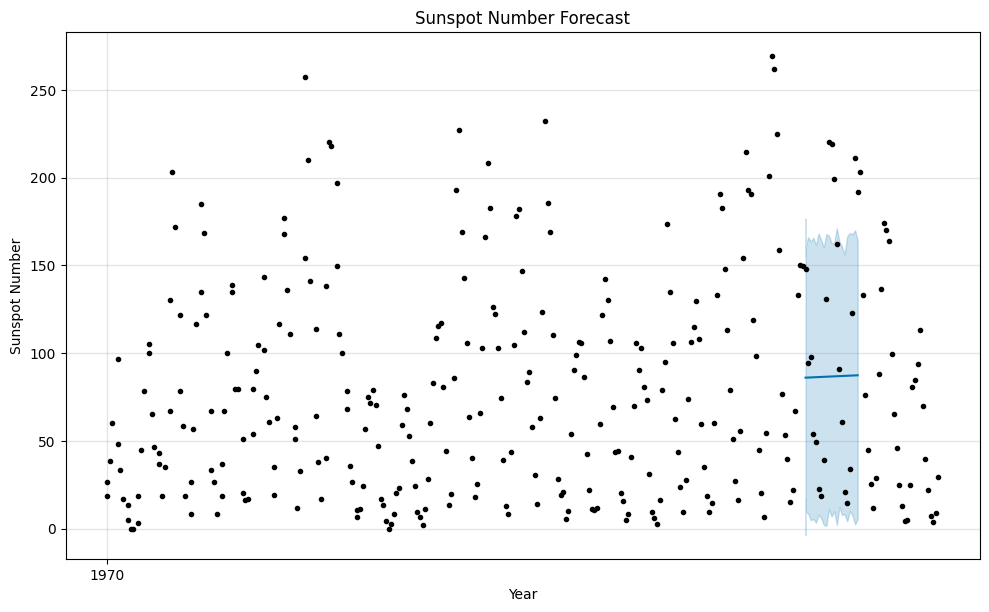

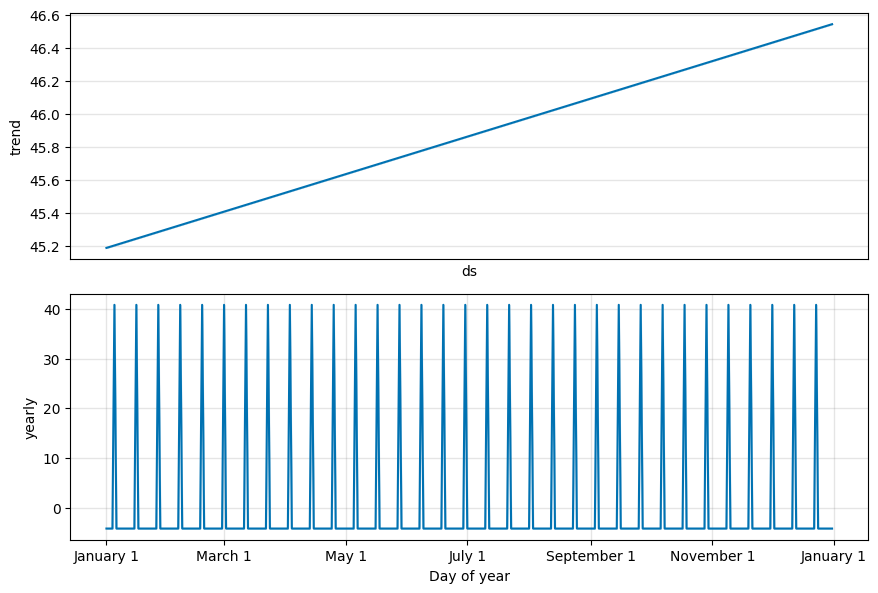

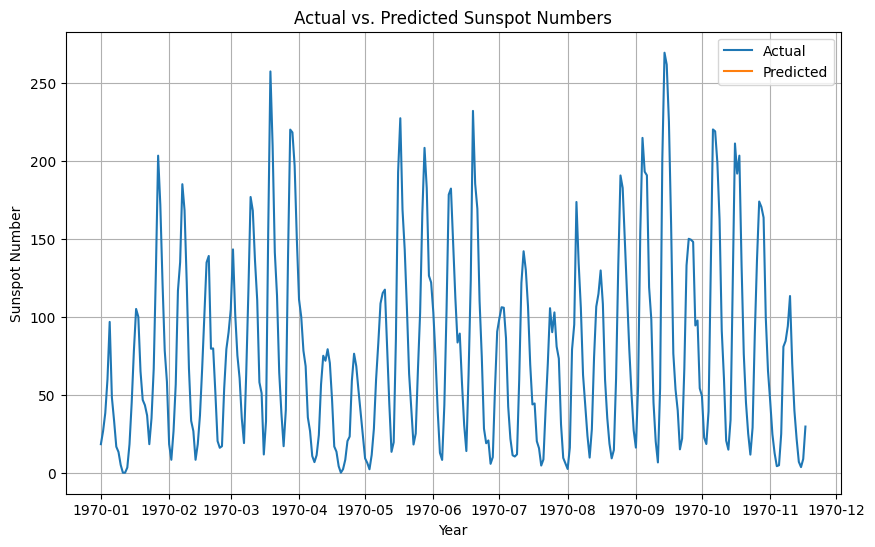

In [27]:


import matplotlib.pyplot as plt


# Visualize the forecast with more details
fig = model.plot(forecast)
plt.xlabel("Year")  # Customize x-axis label
plt.ylabel("Sunspot Number") # Customize y-axis label
plt.title("Sunspot Number Forecast") # Customize plot title
plt.show()


# Plot components
fig2 = model.plot_components(forecast)
plt.show()


# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Actual')
plt.plot(forecast['ds'][:len(data)], forecast['yhat'][:len(data)], label='Predicted')
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.title("Actual vs. Predicted Sunspot Numbers")
plt.legend()
plt.grid(True)
plt.show()



